## COG403: Problem 1 of Problem Set 3: Cross-linguistic Color Representations

### The 2 problems for Problem Set 3 are Due 29 Nov. 2018, 2 pm

In this problem, you'll create a "crosslinguistic semantic space" for color, as in the Beekhuizen & Stevenson (2018) paper, and explore some of its properties.  You'll be using the World Color Survey (WCS) data, which is freely available at https://www1.icsi.berkeley.edu/wcs/data.html.  (Note: We provide all the data you need here, as indicated below, but you might want to explore or read further on the website.)

**For each part of this problem, you'll find a "to do" list, and cells below it that indicate where to insert your code or text answer.  The cells are labeled "Part x.n", where x is the problem part (a, b, c, etc) and n is the numbered item from the to-do list (1, 2, etc) -- eg, "Part a.3".**

**If, for any answer, you want to run additional code to support your answer, create a new code cell and state in a comment the name (Part x.n) of the answer cell that refers to it.**

In [139]:
# The library colormath is used in some functions in provided_functions.py.
# You do not need to call it, but you need to run this cell in order
# to be able to import functions from provided_functions.py.

!pip install colormath

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### (a)  Create a color-chip x color-term matrix from the WCS data

The first step in creating a crosslinguistic semantic space in the domain of color is to generate a color-chip by color-term matrix of color term counts across the 110 languages of the WCS.  This data can be found in `data/term.txt`.

The columns of `data/term.txt` indicate (in this order):
 * Language Number: one of 110 different languages
 * Speaker Number: a label for each informant; not used in this problem
 * Chip Number: one of 330 chips in the Munsell Color Chart
 * Color Term Abbreviation: the color term given for that chip by that speaker
 
Notes regarding the processing of `data/term.txt`:

* Skip rows that have '\*' as the term abbreviation; this represents that the speaker did not give an answer.

* The term abbreviations are per-language and are not unique. This means that for each term, you need to keep track of (language_number, term_abbreviation) pairs. An easy way to do this is to concatenate the Language Number with the Term Abbreviation.

**To do for Part a:**

1. Write `generate_chip_by_term_matrix` according to the docstring below.  To help you in checking your code, we have provided one of the columns of the resulting matrix -- the column for the term 'GB' in language 1 -- in the file `data/wcs_lang1.txt`.  Please ensure your code is correct by checking that the column in your matrix matches this data, before moving on to further steps.

2. Access your matrix to print how many times the PR label for language 49 is used to describe color chip 7.

3. Access your matrix to find a list of languages (by language number) that can use the same color term for chips 197 and 308. Print the number of languages found, followed by the list in sorted order.

In [2]:
# Part a.1: Write and call generate_chip_by_term_matrix.
#           Check your code by comparing the column of your matrix for
#           language 1, term GB against the column provided in
#           'data/wcs_lang1.txt'.

import pandas as pd
from collections import defaultdict, Counter
import numpy as np

from provided_functions import write_matrix, load_matrix

N_CHIPS = 330


def normalize(matrix):
    """
    matrix: 2-d np.array -- matrix to normalize

    Return a normalized version of matrix, where each row has been divided
    by the sum for that row.
    """
    for i in range(len(matrix)):
        if np.sum(matrix[i, :]) != 0:
            matrix[i, :] = matrix[i, :] / np.sum(matrix[i, :])
    return matrix


def generate_chip_by_term_matrix(output_file, input_file):
    """
    output_file: str -- the path to write the chip by term matrix to
    input_file: str -- path of the term file (like 'data/term.txt')

    Generate a normalized chip-by-term matrix and write the output to output_file.
    To do this you should:
    1. Create the matrix from input_file and then normalize it using the function
        provided above before writing it. Your chip-by-term matrix should have one
        row for each of the 330 chips (note that the row for chip 1 should be at
        index 0). Each column should correspond to a particular term in a particular
        language. Before normalization, cells in the matrix indicate the number of
        times a particular term (column) was used to describe a chip (row).
    2. Generate a list of term_labels, such that
        len(term_labels) == chip_by_term_matrix.shape[1]. The term labels indicate
        the language and term that each column is associated with (i.e., you should
        have as many column labels as you have different terms across all languages.)
        In order for the term labels to be unique, you need to concatenate the
        language number with the term code (e.g. '1-GB' for language number 1 with
        term code 'GB').
    3. Call write_matrix defined in provided_functions.py, with the normalized
        chip-by-term-matrix 0 from steps 1 and 2 as arguments.

    """

    df = pd.read_csv(input_file, sep='\t', lineterminator='\n', header=None, na_filter=False)

    # na_filter=False will prevent pandas from interpreting the colour code 'NA' as np.nan

    df.columns = ['Language', 'Speaker', 'Chip', 'Colour']
    df["lang_colour"] = df["Language"].map(str) + '-' + df["Colour"]

    lang_colour_set = set(df['lang_colour'])

    term_labels = list()

    for term in lang_colour_set:
        if '*' not in term:
            term_labels.append(term)

    colour_df = pd.DataFrame(index=range(1, N_CHIPS + 1), columns=term_labels)

    for index in df.index:
        current_row = df.loc[index]
        chip = current_row['Chip']
        lang_colour = current_row['lang_colour']

        if '*' not in lang_colour:
            current_value = colour_df[lang_colour].loc[chip]
            if current_value is np.nan:
                colour_df[lang_colour][chip] = 1
            else:
                colour_df[lang_colour][chip] = current_value + 1
    print("the PR label for language 49 is used to describe color chip 7, " + str(colour_df['49-PR'][7]) + "times")
    colour_df = colour_df.fillna(0)

    colour_df = colour_df.div(colour_df.sum(axis=1), axis=0)
    colour_matrix = colour_df.as_matrix(columns=None)

    write_matrix(output_file, colour_matrix, term_labels)
    return colour_df

matrix_file = 'data/chip_by_term_wcs.tsv'
colour_matrix = generate_chip_by_term_matrix(matrix_file, 'data/term.txt')


the PR label for language 49 is used to describe color chip 7, 21times


In [3]:
# Part a.2: Write and call code to print the answer to question 2 here.


colour_matrix, colour_labels = load_matrix('data/chip_by_term_wcs.tsv')

index = colour_labels.index('49-PR')

print(colour_matrix[6, index])


0.008187134502923977


In [4]:
# Part a.3: Write and call code to print the answer to question 3 here.



index_list_one = []

for index in range(len(colour_matrix[196])):
    if colour_matrix[196][index] != 0:
        index_list_one.append(index)
        
        
index_list_three = []

for index in range(len(colour_matrix[307])):
    if colour_matrix[307][index] != 0:
        index_list_three.append(index)

final_index_list = []        

for i in index_list_three:
    if i in index_list_one:
        final_index_list.append(i)
print(len(final_index_list))


    


print(colour_labels[final_index_list[101]])


545
44-HE


### (b)  Create a color-chip x color-chip distance matrix

We'd like to be able to compare the crosslinguistic semantic space represented by the `chip_by_term_wcs` matrix from part (a) to a perceptual semantic space.  Since each semantic space will have different dimensionality, we need to transform each space to one based on **relative distances** between the color chips.  As in the B&S paper, you'll compare all pairs of color-chip vectors in the `chip_by_term_wcs` matrix to create a color-chip x color-chip distance matrix.

To accomplish this, write a function `generate_distance_matrix`. Given any 2D matrix, your function should return a matrix of distances between the rows of the input matrix.

For example, for the example matrix:

[[1, 1], [1, 2], [4, 5]]

there are three rows:

 * Row 1: [1, 1]
 * Row 2: [1, 2]
 * Row 3: [4, 5]

For this input, you need to generate a matrix containing the distances between each pair of rows, yielding the following (where each row is [dist_from_row_1, dist_from_row_2, dist_from_row_3]):
```
 [[0.00, 1.00, 5.00]
  [1.00, 0.00, 4.24]
  [5.00, 4.24, 0.00]]
```

**To do for Part b:**

1. Write `generate_distance_matrix` according to the docstring.

2. Call your function on `test_case` defined below (same as the example above), and print your result.

3. Call your function on the chip x term matrix you generated in part a.  To check your code, verify that the first row of the resulting distance matrix matches the array in `data/wcs_dist_mat_chip1.txt` before going on to subsequent steps.  Print the distance between chips 197 and 308.

In [5]:
# Part b.1: Write generate_distance_matrix

from scipy.spatial.distance import euclidean
import numpy as np


def generate_distance_matrix(matrix):
    """
    matrix: 2d np.array -- matrix to use to generate distance matrix
    
    Return a distance matrix between the rows of matrix. Write your code
    according to the specifications above.
    """
    
    size = matrix.shape[0]
    
    d_matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            d_matrix[i,j] = euclidean(matrix[i], matrix[j])

    return(d_matrix)
    
# matrix = np.random.rand(3,2)




In [6]:
# Part b.2: Print the answer to question 2.
#           Check your answer against the answer above before continuing.

example_matrix = np.array([[1,1], [1,2], [4,5]])
print(generate_distance_matrix(example_matrix))


[[0.         1.         5.        ]
 [1.         0.         4.24264069]
 [5.         4.24264069 0.        ]]


In [7]:
# Part b.3: Write and call code to print the answer to question 3.

colour_matrix, colour_labels = load_matrix('data/chip_by_term_wcs.tsv')

print(generate_distance_matrix(colour_matrix)[196, 307])

0.02246834786490477


### (c)  Compare chip x chip distance matrices across spaces

We'll compare the crosslinguistic space to a perceptual space given by L\*a\*b\* coordinates. The L\*a\*b\* space is a color space with three dimensions: L\* represents lightness, a\* represents the spectrum from green to red, and b\* represents the spectrum from blue to yellow. This space was cognitively motivated, and was designed such that the distance between two points in the L\*a\*b\* space is correlated with human perceived differences (rather than with physical properties of the colors). For more information on the L\*a\*b\* space, see [this description](https://en.wikipedia.org/wiki/CIELAB_color_space).

The L\*a\*b\* values of the color chips are stored in `data/perceptual_color_mat.tsv` (a color chip x L\*a\*b\* features matrix).

**To do for Part c:**

1. Call the function `generate_distance_matrix` on the matrix `data/perceptual_color_mat.tsv`.

2. Call `generate_distance_matrix` on the chip x term matrix that you created in part (a).

3. Calculate Pearson r and its associated p value on these two matrices, and print the results.

4. What does the result of the Pearson test tell you about the relation between the crosslinguistic semantic space and the perceptual space?  For example, is the crosslinguistic space nearly identical to the perceptual space, completely different, or in between?  What do you think this says about the relation between color term systems and human perception of color?

In [8]:
# Part c.1: Call code to create the perceptual distance matrix
colour_matrix, colour_labels = load_matrix('data/perceptual_color_mat.tsv')
mat = generate_distance_matrix(colour_matrix)


In [9]:
# Part c.2: Call code to create the WCS distance matrix

colour_matrix, colour_labels = load_matrix('data/chip_by_term_wcs.tsv')
wcs = generate_distance_matrix(colour_matrix)


(0.6220727896251244, 0.0)


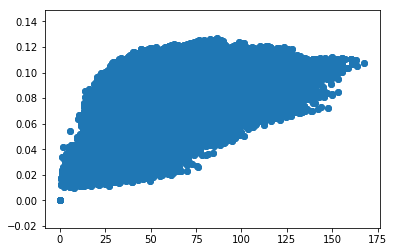

In [10]:
# Part c.3: Calculate pearsonr and print results on the above two matrices
# (Hint: you should call np.array.flatten(), since pearsonr only works 
# on one-dimensional arrays)
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

print(pearsonr(mat.flatten(), wcs.flatten()))

plt.scatter(mat.flatten(), wcs.flatten())
plt.show()


There seems to be a fairly significant positive correlation between the crosslinguistic colour space and the perceptual colour space. This means that humans across different cultures are fairly succesful and consistent at seperating colours into destinct categories.

**Part c.4:** Enter answer to question 4 here. (No more than 150 words.)


What does the result of the Pearson test tell you about the relation between the crosslinguistic semantic space and the perceptual space? For example, is the crosslinguistic space nearly identical to the perceptual space, completely different, or in between? What do you think this says about the relation between color term systems and human perception of color?

The result of the Pearson test tells me that there is a linear positive relationship between the crosslinguistic semantic space and the perceptual space with an increadibly small p-value. This indicates that color term systems and human perception of color mimic each other. With very high probability, human color perception affect the color term system.

### (d) Compare the full semantic space to different language families

Here you'll create semantic spaces from various language families of the WCS, and explore the range of variation they show when compared to the full crosslinguistic space created from the entire WCS data.

**To do for Part d:**

1. Modify your `generate_chip_by_term_matrix` function from part (a) to be restricted to languages passed in through the `lang_filter` parameter. To do this, copy over your code from part (a) and modify it.  This function will be called by the function you write next.

2. Write a function `evaluate_language_family_correlations` according to the docstring below. This function will compare distance matrices for various language families with the distance matrix based on the full WCS data (which you computed in part (c)), and will print a summary for each language family.  Call `evaluate_language_family_correlations` on `'data/term.txt'` and `'data/language_families.tsv'`.

3. What do you think influences the degree of correlation between the full semantic space and ones created from a single language family?  Discuss the impact of the number of languages.

In [14]:
# Part d.1: Copy and modify your `generate_chip_by_term_matrix` function
#           from part (a) to be restricted to languages passed in through 
#           the `lang_filter` parameter.


def generate_chip_by_term_matrix(output_file, input_file, lang_filter=None):
    """
    output_file: str -- the path to write the chip by term matrix to
    input_file: str -- path of the term file (like 'data/term.txt')
    lang_filter: list of int -- numbers indicating languages to use for generating
        the chip by term matrix. A table mapping language numbers to language
        info can be found in 'data/language_families.tsv'.
    
    Generate a normalized chip-by-term matrix and write the output to output_file.
    To do this you should:
    1. Create the matrix from input_file and then normalize it using the function
        provided above before writing it. Your chip-by-term matrix should have one
        row for each of the 330 chips (note that the row for chip 1 should be at
        index 0). Each column should correspond to a particular term in a particular
        language. Before normalization, cells in the matrix indicate the number of
        times a particular term (column) was used to describe a chip (row).
    2. Generate a list of term_labels, such that 
        len(term_labels) == chip_by_term_matrix.shape[1]. The term labels indicate
        the language and term that each column is associated with (i.e., you should
        have as many column labels as you have different terms across all languages.)
        In order for the term labels to be unique, you need to concatenate the 
        language number with the term code (e.g. '1-GB' for language number 1 with
        term code 'GB').
    3. Call write_matrix defined in provided_functions.py, with the normalized 
        chip-by-term-matrix and term_labels from steps 1 and 2 as arguments.
    
    """
    df = pd.read_csv(input_file, sep='\t', lineterminator='\n', header=None, na_filter=False)

    # na_filter=False will prevent pandas from interpreting the colour code 'NA' as np.nan

    df.columns = ['Language', 'Speaker', 'Chip', 'Colour']
    df["lang_colour"] = df["Language"].map(str) + '-' + df["Colour"]

    lang_colour_set = set(df['lang_colour'])

    term_labels = list()

    for term in lang_colour_set:
        if '*' not in term:
            term_labels.append(term)

    colour_df = pd.DataFrame(index=range(1, N_CHIPS + 1), columns=term_labels)

    for index in df.index:
        current_row = df.loc[index]
        chip = current_row['Chip']
        lang_colour = current_row['lang_colour']
        
        if '*' not in lang_colour:

            current_value = colour_df[lang_colour].loc[chip]
            if current_value is np.nan:
                colour_df[lang_colour][chip] = 1
            else:
                colour_df[lang_colour][chip] = current_value + 1

    colour_df = colour_df.fillna(0)

    colour_df = colour_df.div(colour_df.sum(axis=1), axis=0)
    colour_matrix = colour_df.as_matrix(columns=None)

    
    new_df = pd.DataFrame()
    
    
    for language_num in lang_filter:
        for term in term_labels:
            if str(language_num) == term.split('-')[0]:
                new_df[term] = colour_df[term]

    
    new_colour_matrix = new_df.as_matrix(columns=None)
    
    write_matrix(output_file, new_colour_matrix, list(new_df.columns))

    return new_df



# matrix_file = 'data/chip_by_term_wcs.tsv'
# colour_matrix = generate_chip_by_term_matrix(matrix_file, 'data/term.txt', [1, 5])


In [38]:
# Part d.2: Write the function `evaluate_language_family_correlations`.
#           You may find it faster to debug your code with a higher
#           min_members value than the default of 5.  But please turn
#           in a call to your code using the default of 5, and base your 
#           answer to part d.3 on that call.

from collections import defaultdict
from scipy.stats import pearsonr

from provided_functions import load_matrix


def get_language_families(family_file, min_members=5):
    """
    family_file: str -- path to file containing mapping between language number
        and language family.
    min_members: int -- minimum number of languages that must occur in a family
        for the family to be included in the result.
    
    Return a dict mapping str to list of int, mapping the names of language
    families to the language numbers of languages in that family.
    """
    result = defaultdict(list)
    with open(family_file) as f:
        next(f)  # skip headers
        for line in f:
            line = line.strip().split('\t')
            lang_id = line[0]
            lang_fam = line[-1]
            if lang_fam == 'Isolate':
                continue
            result[lang_fam].append(lang_id)
    
    result_filtered = {}
    for fam, langs in result.items():
        if len(langs) >= min_members:
            result_filtered[fam] = langs
    return result_filtered


def evaluate_language_family_correlations(
        term_file, family_file, min_members=5):
    """
    term_file: str -- path to term file (like 'data/term.txt')
    family_file: str -- path to language family file (like 'data/language_families.tsv')
    
    This function should: 
        1. Generate a distance matrix based on all terms for all languages in term_file.
        2. Call get_language_families on family_file to get groupings of language ids
        3. Generate a chip by term matrix for each language family returned by 
            get_language_families. Save each matrix in a file called
            data/chip_matrix_wcs_X.tsv where X is the name of the language family.
        4. For each language family, compute the pearson correlation between the 
            distance matrix for that language family and the distance matrix for 
            the full WCS. (Hint: you should call np.array.flatten(), since pearsonr
            only works on one-dimensional arrays.)
        5. Print the name of each language family, the number of languages it contains,
            and the correlation r and p value between the distance matrix for that 
            language family and the distance matrix for the full WCS.
    """
#     df_term = pd.read_csv(term_file, '\t')
#     df_family = pd.read_csv(family_file, '\t')
#     print(df_term.head)
    
    output_file = 'data/tmp_matrix.tsv'
    
    lang_filter = list(range(1, 111))    
    generate_chip_by_term_matrix(output_file, term_file, lang_filter)

    colour_matrix, colour_labels = load_matrix(output_file)
    distance_matrix = generate_distance_matrix(colour_matrix)

    language_dict = get_language_families(family_file)
    
    for language_family in language_dict:
        output_file = 'data/chip_matrix_wcs_' + language_family + '.tsv'
        generate_chip_by_term_matrix(output_file ,term_file, language_dict[language_family])

    matrix_file = 'data/chip_by_term_wcs.tsv'
    chip_by_term_mat, term_labels = load_matrix(matrix_file)
    WCS_distance_matrix = generate_distance_matrix(chip_by_term_mat)
    for language_family in language_dict:
        matrix, language_terms = load_matrix('data/chip_matrix_wcs_' + language_family + '.tsv')
        distance_matrix = generate_distance_matrix(matrix)
        r, p = pearsonr(distance_matrix.flatten(), WCS_distance_matrix.flatten())
        print('Language Family: ' + language_family + ' containing ' + str(len(language_dict[language_family])) + ' languages has a r-value of ' +
             str(r) + ' and a p-value of ' + str(p))
        
        
        
    
evaluate_language_family_correlations(
    'data/term.txt', 'data/language_families.tsv')

Language Family: Niger-Congo containing 12 languages has a r-value of 0.8350931415554483 and a p-value of 0.0
Language Family: Trans-New Guinea containing 11 languages has a r-value of 0.7854321499941731 and a p-value of 0.0
Language Family: Austronesian containing 8 languages has a r-value of 0.7476666804373143 and a p-value of 0.0
Language Family: Arawakan containing 5 languages has a r-value of 0.7127286535698634 and a p-value of 0.0
Language Family: Oto-Manguean containing 7 languages has a r-value of 0.5702487508616734 and a p-value of 0.0
Language Family: Indo-European containing 9 languages has a r-value of 0.6799555149335422 and a p-value of 0.0
Language Family: Chibchan containing 6 languages has a r-value of 0.7463166108904665 and a p-value of 0.0
Language Family: Pano-Tacanan containing 7 languages has a r-value of 0.7717986094792786 and a p-value of 0.0
Language Family: Uto-Aztecan containing 5 languages has a r-value of 0.5933242819936023 and a p-value of 0.0


**Part d.3:** Input the answer to question 3 here.  (No more than 150 words.)

#### What do you think influences the degree of correlation between the full semantic space and ones created from a single language family? Discuss the impact of the number of languages.

The more languages are contained within a languagle family, the more similar this language family is to the full semantic space. I think there are two reasons for this:

1. If a language family contais more languages, then it has a larger impact in shaping the overall semantic space. Simply proportional, if 12 / 70 languages in the WCS are from a single family, then that family will have more power in shaping the WCS than a language family that only contributes 5 languages to the 70.
2. It is also important to look at the evolution of language. The Uto-Aztecan and Oto-Manguean are probably a lot more dissimilar to the average language family because it has had so little contact with each other for so long. Even distinct language families usually influence each other, and will thus be more similar.

### (e)  Examine the first few principal components from PCA

An interesting finding related to the semantics of colors is that there are evolutionary patterns in color term adoption. More specifically, as a language adds terms to make distinctions between colors, there are some commonalities between the types of splits that occur. For example, most languages that have only two color terms have labels that refer to white/red/yellow and black/green/blue. When a third color term is added, typically white splits off from red/yellow. The diagram below shows known paths of color evolution in language.

In this question, you'll analyze whether the cross-linguistic data and/or perceptual data are predictive of the paths of color evolution.  To do so, you'll use Principal Component Analysis (PCA). This is a **dimensionality reduction** technique that can be used to transform a high dimensional space (such as the color x term matrix) into a lower N dimensional space.  For example, when calling PCA with N=5 on the chip x term matrix for the WCS, the resulting matrix will have 330 rows by 5 columns (5 extracted dimensions) instead of 330 rows by `len(term_labels)` columns.

PCA works by iteratively extracting the dimensions of the data with the highest variance, up to the number of dimensions N specified. Because the dimensions with the highest variance are extracted first in PCA, we can consider the extracted dimensions as the N most important dimensions in defining the original space.

We can then compare the N dimensions from PCA -- for N=1, N=2, etc. -- to the evolution of color terms to see if 1 dimension captures the white/red/yellow vs. black/green/blue split, and if 2 dimensions capture the next split (eg, of yellow from red), etc.  That is, we want to see whether the single most important dimension in the data captures the white/red/yellow vs. black/green/blue split.  Similarly, if we have the 2 most important dimensions, we see if they capture the white vs. red/yellow vs. black/green/blue splits.  And again, if we have the 3 most important dimensions, we see whether they reflect one of the subsequent splits in the evolutionary diagram below.

We can do this by finding the extremes in the PCA space, which can be thought of as the most conceptually salient extremes. After projecting a high dimensional chip-by-term matrix to a lower N-dimensional space, we can find extreme points in that PCA space. We define extreme points as points that have a maximum or minimum value along a given axis. For example, for one dimension (N=1), there are two extremes: the minimum and maximum points. For two dimensions (N=2), there are at most four extremes: minimum and maximum for the x axis, and minimum and maximum for the y axis.  We can analyze the colors that these extreme points map to, for N=1 to N=5, to test whether the most salient aspects of the data reflect the evolutionary salience of various colors.

**To do for part e**:

 1. Write the function `identify_extreme_points` according to the docstring below.
 
 2. Call the code in cell **WCS PCA Analysis** and answer the following in cell Part e.2 based on the results:  Explain whether the PCA analysis of the semantic space based on the WCS suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.
 
 3. Call the code in cell **Perceptual PCA Analysis** and answer the following in cell Part e.3 based on the results:  Explain whether the PCA analysis of the perceptual space suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.  What do you think underlies the differences between the findings here and in part e.2?
 
 4. Call the code in cell **Niger-Congo PCA Analysis** and answer the following in cell Part e.4 based on the results:  Explain whether the PCA analysis of the semantic space based on the Niger-Congo language family suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.  What do you think underlies the differences between between the findings here and in part e.2?  You might also want to refer back to your findings in part (d).
 
**NOTE: There is only one truly black chip in the 330 chips.  When you're considering a mapping to the evolutionary diagram, you might find that you have to consider another very dark color as possibly corresponding to black.  The plots we generate for you should help you to see this.**

W=white; R=red; Y=yellow; Bk=black; G=green; Bu=blue
![Alt text](https://notebooks.azure.com/cog403/libraries/in-progress-3-1/raw/color_evolution_Kay_Cook_2009.png)


In [246]:
# Part e.1: Write the function `identify_extreme_points` according to the
#           docstring below.

from collections import Counter
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

from provided_functions import load_matrix


def get_english_chip_labels():
    """
    Return a list of str, where every index contains an English label
    for one of the 330 Munsell Color Chips. Note that chip 1 will be
    at index 0.
    """
    chip_to_label = {}
    with open('data/chip_en_labels.txt', 'r') as f:
        for line in f:
            line = line.strip('\n').split('\t')
            chip_to_label[int(line[0])] = line[-1]
    return [chip_to_label[i + 1] for i in range(len(chip_to_label))]


def get_extreme_point_color(matrix, point, n_neighbors=10):
    """
    matrix: a 2D np.array -- matrix to use to compute nearest neighbors
    point: a list of float -- point to compute nearest neighbors of
    
    Compute the 10 nearest neighbors of point in matrix. Then find the most
    common English label from among these points.
    """
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(matrix)
    english_labels = get_english_chip_labels()
    distances, indices = nbrs.kneighbors([point])
    indices = indices[0]
    # no need to add index back in because it was found
    color_label_counter = Counter([english_labels[i] for i in indices])
    best_label = color_label_counter.most_common(1)[0]
    return best_label


def identify_extreme_points(matrix, n_neighbors=10):
    """
    matrix: a 2D np.array
    n_neighbors: int -- the number of neighbors to use to generate the color
        labels (pass this to get_extreme_point_color)
    
    Print a summary of extreme points in matrix.
        1. Detect extreme points by selecting the points with min and max values
            for each dimension (two points per dimension).
        2. Filter the detected extreme points by removing one point for each pair
            of points that is closer to each other than they are to the mean point.
        3. On a single line, and in this order: Print the color label of each 
            extreme point (get a label for each point
            using the function get_extreme_point_color defined above), and the
            percent of neighbors that have this color. Also print the coordinates
            of the extreme point to 2 decimal places.
    """
    extreme_points = []
    
    mean_point = []
    
    
    for dimension in range(matrix.shape[1]):
        
        max_ind = np.argmax(matrix[:, dimension])
        extreme_points.append(matrix[max_ind, :])
        
        min_ind = np.argmin(matrix[:, dimension])
        extreme_points.append(matrix[min_ind, :])
        
        dimensional_mean = np.mean(matrix[:, dimension])
        print(dimensional_mean)
        mean_point.append(dimensional_mean)
    
    counter = 0
    for point in extreme_points:
                
        mean_distance = euclidean(mean_point, point)
        
        
        for comparison_point in extreme_points:
            if all((point != comparison_point)) and counter < len(extreme_points) / 2:
                distance = euclidean(point, comparison_point)
                
                if distance < mean_distance:
                    counter += 1
                    try:
                        extreme_points.remove(point)
                    except:
                        pass

    
    for point in extreme_points:
        colour = get_extreme_point_color(matrix, point, n_neighbors)
        point = np.round(point, 2)

        print('Colour: ' + str(colour[0]) + ' Percentage '+ str(colour[1] / 10) + ' Coordinates: ' + str(point))
        print(point.astype(float))


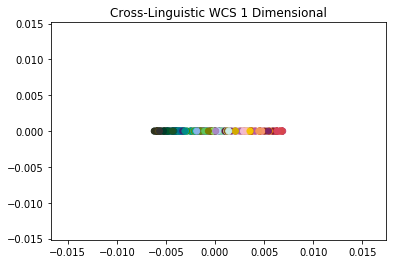

-3.995120732552647e-19
Colour: red Percentage 0.4 Coordinates: [0.01]
[0.01]
Colour: brown Percentage 0.6 Coordinates: [-0.01]
[-0.01]


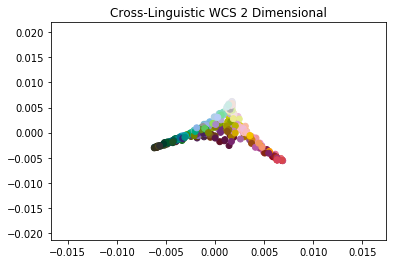

-3.995120732552647e-19
1.5770213417970974e-19
Colour: red Percentage 0.4 Coordinates: [ 0.01 -0.01]
[ 0.01 -0.01]
Colour: brown Percentage 0.6 Coordinates: [-0.01 -0.  ]
[-0.01 -0.  ]
Colour: grey Percentage 0.4 Coordinates: [0.   0.01]
[0.   0.01]
Colour: red Percentage 0.4 Coordinates: [ 0.01 -0.01]
[ 0.01 -0.01]


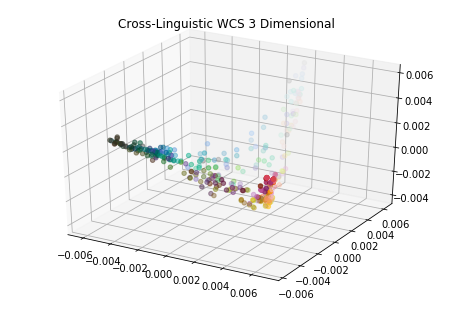

-3.995120732552647e-19
1.5770213417970974e-19
2.076411433366178e-19
Colour: red Percentage 0.4 Coordinates: [ 0.01 -0.01  0.  ]
[ 0.01 -0.01  0.  ]
Colour: brown Percentage 0.6 Coordinates: [-0.01 -0.    0.  ]
[-0.01 -0.    0.  ]
Colour: white Percentage 0.4 Coordinates: [0.   0.01 0.01]
[0.   0.01 0.01]
Colour: red Percentage 0.4 Coordinates: [ 0.01 -0.01  0.  ]
[ 0.01 -0.01  0.  ]
Colour: white Percentage 0.4 Coordinates: [0.   0.01 0.01]
[0.   0.01 0.01]
Colour: green Percentage 0.6 Coordinates: [ 0.  0. -0.]
[ 0.  0. -0.]

Cross-Linguistic WCS 4 Dimensional
-3.995120732552647e-19
1.5770213417970974e-19
2.076411433366178e-19
-9.462128050782584e-20
Colour: red Percentage 0.4 Coordinates: [ 0.01 -0.01  0.    0.  ]
[ 0.01 -0.01  0.    0.  ]
Colour: brown Percentage 0.6 Coordinates: [-0.01 -0.    0.   -0.  ]
[-0.01 -0.    0.   -0.  ]
Colour: white Percentage 0.4 Coordinates: [ 0.    0.01  0.01 -0.  ]
[ 0.    0.01  0.01 -0.  ]
Colour: red Percentage 0.4 Coordinates: [ 0.01 -0.01  0.    0

In [247]:
# WCS PCA Analysis:  Call this code to answer part e.2

from provided_functions import load_matrix, create_pca_graph
from sklearn.decomposition import PCA

# FOR WCS DATA

matrix_file = 'data/chip_by_term_wcs.tsv'
chip_by_term_mat, term_labels = load_matrix(matrix_file)

pca = PCA(n_components=1)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic WCS 1 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=2)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic WCS 2 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=3)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic WCS 3 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic WCS 4 Dimensional")
pca = PCA(n_components=4)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic WCS 5 Dimensional")
pca = PCA(n_components=5)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

**Part e.2:** Input the answer to part e.2 here. (No more than 200 words.)

Explain whether the PCA analysis of the semantic space based on the WCS suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.



The PCA analysis of the semantic space matches some of the pathways of the evolutionary diagram. In takes the middle pathway until step from 3 to 4 where in the pathway the red and yellow divide into two, in our case it seems like the green divides into green and blue instead. Also after step 4, our model remains constant, we never get a single yellow.


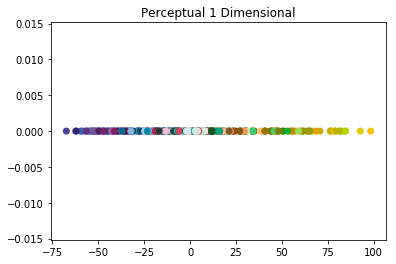

-3.6689843082885176e-14
Colour: yellow Percentage 0.5 Coordinates: [98.32]
[98.32]
Colour: blue Percentage 0.7 Coordinates: [-67.38]
[-67.38]


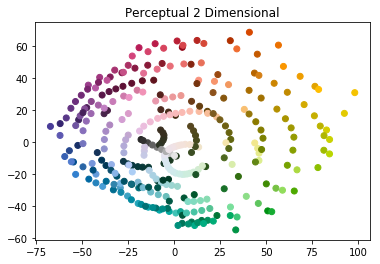

-3.6689843082885176e-14
1.843104793365593e-14
Colour: purple Percentage 0.6 Coordinates: [-67.38   9.64]
[-67.38   9.64]
Colour: orange Percentage 0.8 Coordinates: [40.94 68.56]
[40.94 68.56]
Colour: green Percentage 1.0 Coordinates: [ 33.51 -55.11]
[ 33.51 -55.11]


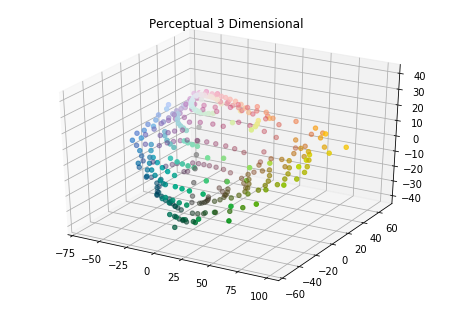

-3.6689843082885176e-14
1.843104793365593e-14
-1.2987859945772497e-13
Colour: purple Percentage 0.6 Coordinates: [-67.38   9.64  -8.24]
[-67.38   9.64  -8.24]
Colour: orange Percentage 0.8 Coordinates: [40.94 68.56 -5.52]
[40.94 68.56 -5.52]
Colour: green Percentage 1.0 Coordinates: [ 33.51 -55.11 -20.95]
[ 33.51 -55.11 -20.95]
Colour: white Percentage 0.5 Coordinates: [ 1.38 -9.38 39.72]
[ 1.38 -9.38 39.72]
Colour: green Percentage 1.0 Coordinates: [ -3.08 -23.46 -39.64]
[ -3.08 -23.46 -39.64]


In [248]:
# Perceptual PCA Analysis:  Call this code to answer part e.3

from provided_functions import load_matrix, create_pca_graph
from sklearn.decomposition import PCA

# FOR PERCEPTUAL DATA

matrix_file = 'data/perceptual_color_mat.tsv'
perceptual_mat, term_labels = load_matrix(matrix_file)

pca = PCA(n_components=1)
perc_pca = pca.fit_transform(perceptual_mat)
create_pca_graph(perc_pca, title="Perceptual 1 Dimensional")
identify_extreme_points(perc_pca)

pca = PCA(n_components=2)
perc_pca = pca.fit_transform(perceptual_mat)
create_pca_graph(perc_pca, title="Perceptual 2 Dimensional")
identify_extreme_points(perc_pca)

pca = PCA(n_components=3)
perc_pca = pca.fit_transform(perceptual_mat)
create_pca_graph(perc_pca, title="Perceptual 3 Dimensional")
identify_extreme_points(perc_pca)

**Part e.3:** Input the answer to part e.3 here. (No more than 200 words.)

 3. Call the code in cell **Perceptual PCA Analysis** and answer the following in cell Part e.3 based on the results:  Explain whether the PCA analysis of the perceptual space suggests a match to one of the evolutionary pathways in the diagram below, and if so, which one.  What do you think underlies the differences between the findings here and in part e.2?

These results most closely follow the middle pathway in step I and II, and the goes towards to top pathway in step 3. I think fundamentally the difference between the e.2 and e.3 is the focus on colour and light. In the previous question we first divided up the light and dark colours -- the colours themselves were not a priority like in this. Here the division is most focused upon the color; we first divide up the yellow and blues, then the we further subdivide this into purple orange and gree, and finally we also extract white.


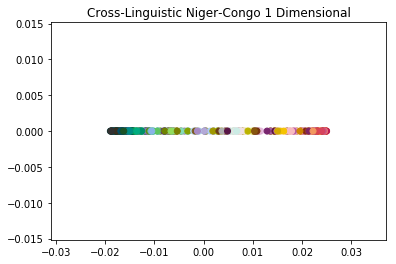

4.415659757031872e-19
Colour: pink Percentage 0.4 Coordinates: [0.02]
[0.02]
Colour: brown Percentage 0.4 Coordinates: [-0.02]
[-0.02]


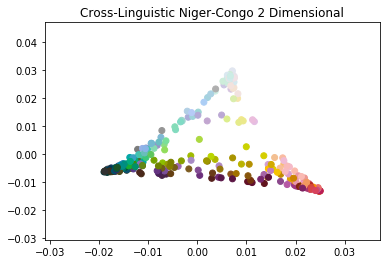

4.415659757031872e-19
-1.261617073437678e-18
Colour: brown Percentage 0.4 Coordinates: [-0.02 -0.01]
[-0.02 -0.01]
Colour: grey Percentage 0.4 Coordinates: [0.01 0.03]
[0.01 0.03]
Colour: orange Percentage 0.4 Coordinates: [ 0.02 -0.01]
[ 0.02 -0.01]


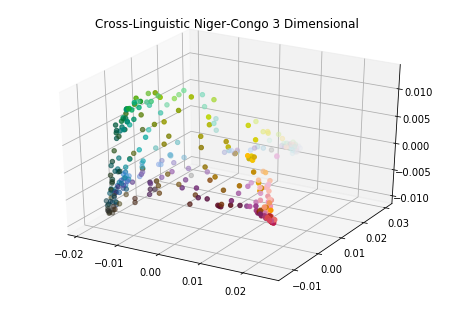

4.415659757031872e-19
-1.261617073437678e-18
1.5980482930210587e-18
Colour: green Percentage 0.4 Coordinates: [-0.02 -0.01 -0.01]
[-0.02 -0.01 -0.01]
Colour: white Percentage 0.4 Coordinates: [ 0.01  0.03 -0.  ]
[ 0.01  0.03 -0.  ]
Colour: red Percentage 0.4 Coordinates: [ 0.02 -0.01 -0.  ]
[ 0.02 -0.01 -0.  ]
Colour: green Percentage 1.0 Coordinates: [-0.01 -0.    0.01]
[-0.01 -0.    0.01]
Colour: brown Percentage 0.6 Coordinates: [-0.02 -0.01 -0.01]
[-0.02 -0.01 -0.01]

Cross-Linguistic Niger-Congo 4 Dimensional
4.415659757031872e-19
-1.261617073437678e-18
1.5980482930210587e-18
-1.2511035978256972e-18
Colour: green Percentage 0.4 Coordinates: [-0.02 -0.01 -0.01  0.  ]
[-0.02 -0.01 -0.01  0.  ]
Colour: white Percentage 0.5 Coordinates: [ 0.01  0.03 -0.   -0.  ]
[ 0.01  0.03 -0.   -0.  ]
Colour: orange Percentage 0.4 Coordinates: [ 0.02 -0.01 -0.   -0.01]
[ 0.02 -0.01 -0.   -0.01]
Colour: green Percentage 1.0 Coordinates: [-0.01 -0.    0.01 -0.  ]
[-0.01 -0.    0.01 -0.  ]
Colour: bro

In [250]:
# Niger-Congo PCA Analysis:  Call this code to answer part e.4

from provided_functions import load_matrix, create_pca_graph
from sklearn.decomposition import PCA

# FOR NIGER-CONGO DATA

matrix_file = 'data/chip_matrix_wcs_Niger-Congo.tsv'
chip_by_term_mat, term_labels = load_matrix(matrix_file)

pca = PCA(n_components=1)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic Niger-Congo 1 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=2)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic Niger-Congo 2 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

pca = PCA(n_components=3)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
create_pca_graph(chip_by_term_mat_pca, title="Cross-Linguistic Niger-Congo 3 Dimensional")
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic Niger-Congo 4 Dimensional")
pca = PCA(n_components=4)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

print("\nCross-Linguistic Niger-Congo 5 Dimensional")
pca = PCA(n_components=5)
chip_by_term_mat_pca = pca.fit_transform(chip_by_term_mat)
identify_extreme_points(chip_by_term_mat_pca)

**Part e.4:** Input the answer to part e.4 here. (No more than 200 words.)
 
The Niger-Congo PCA analysis of the semantic space matches the middle pathway of the evoluntionary pathway exactly. The difference between this and e.2 is fairly insignificant. The primary difference is that in stage 1 and 2, the colours were lighter than they were in e.2. This is not suprising though since the Niger-Congo language analysis and WCS in part (d) yielded a high correlation (0.8350931415554483 with p value 0). In other words, the Niger-Congo language evolution is very similar to the human language evolution. 

I have a theory for why some cultures would choose a boundry in one spot rather than another. If a culture has to divide all colours into two categories, it should aim to set the boundry so that the usage of either colour term is approximatly equal. Making an analogy to statistics, we want the cumulative area under the density function (which corresponds to # of times the colour term is used) to be equal in both partitions. Where a culture sets the partition depends on their enviornment, if there's not a lot of colours, they might focus on dividing the darks and lights from each other. On the otherhand, if there's a lot of colours, it may be most useful to divide those up first.